# CNNの指定したConvolutionのカーネルを行列として取り出す

このノートブックでは、PyTorchを使用してCIFAR-10データセットを使ってCNNモデルの指定された畳み込み層のカーネル（重み）を行列として抽出します。

In [1]:
# ライブラリのインポート
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

## CIFAR-10 データセットの読み込み

In [2]:
# データの前処理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 データセットをダウンロード・読み込み
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:31<00:00, 5.34MB/s] 


## CNNモデルの定義

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 入力チャネル3、出力チャネル6、カーネルサイズ5
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# モデルの初期化
model = SimpleCNN()

## 指定されたConv層のカーネルを行列として取得

In [4]:
# 例として、conv1 層のカーネルを取得
conv_layer = model.conv1  # または conv2 など

# カーネルの重みを取得（shape: [out_channels, in_channels, height, width]）
kernel_weights = conv_layer.weight.data

print("Kernel shape:", kernel_weights.shape)

# NumPy に変換して表示
kernel_matrix = kernel_weights.numpy()

# 各カーネルを展開（1つの行列に結合）
print("Kernel matrix shape (flatten):", kernel_matrix.shape)

Kernel shape: torch.Size([6, 3, 5, 5])
Kernel matrix shape (flatten): (6, 3, 5, 5)


## カーネルの可視化（例）

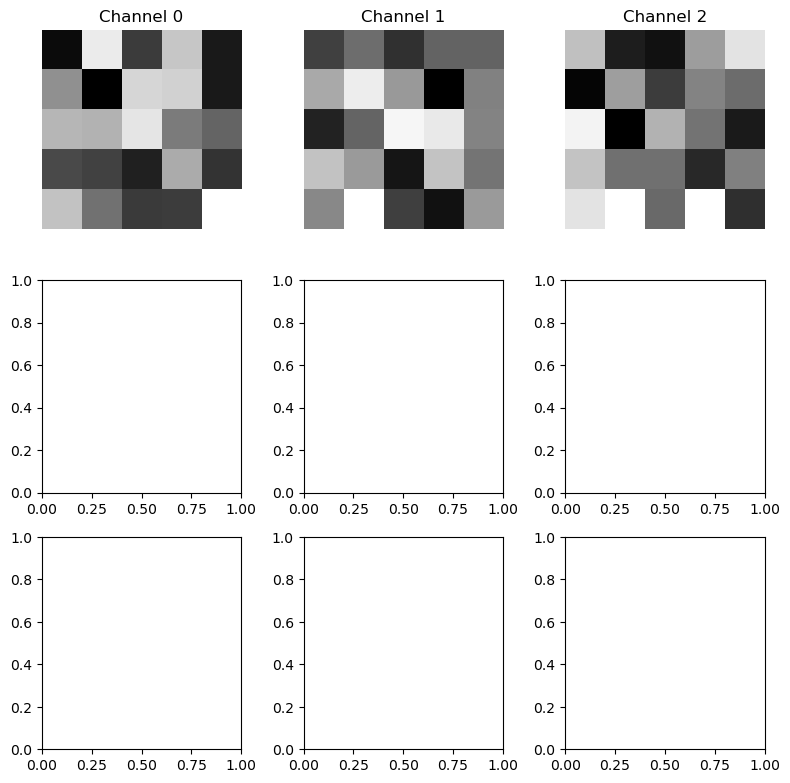

In [5]:
# matplotlib のインポート
import matplotlib.pyplot as plt

# 各カーネルを表示（例: conv1 の最初のカーネル）
kernel = kernel_matrix[0]  # 最初の出力チャネルのカーネル

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(kernel):
            axes[i, j].imshow(kernel[idx], cmap='gray')
            axes[i, j].set_title(f'Channel {idx}')
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()